# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [2]:
df = pd.read_csv('../data/checker_submits.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head(10)

,uid,labname,numTrials,timestamp
0,user_4,project1,1,2020-04-17 05:19:02.744528
1,user_4,project1,2,2020-04-17 05:22:45.549397
2,user_4,project1,3,2020-04-17 05:34:24.422370
3,user_4,project1,4,2020-04-17 05:43:27.773992
4,user_4,project1,5,2020-04-17 05:46:32.275104
5,user_4,project1,6,2020-04-17 05:50:27.860908
6,user_4,project1,7,2020-04-17 05:52:56.335091
7,user_4,laba04,1,2020-04-17 11:33:17.366400
8,user_4,laba04,2,2020-04-17 11:40:05.237273
9,user_4,laba04,3,2020-04-17 11:44:20.707058


In [3]:
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df.drop(columns=['timestamp'], inplace=True)
df

,uid,labname,numTrials,hour,dayofweek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4
...,...,...,...,...,...
1681,user_19,laba06s,9,20,3
1682,user_1,laba06s,6,20,3
1683,user_1,laba06s,7,20,3
1684,user_1,laba06s,8,20,3


In [4]:
encoder = OneHotEncoder(sparse_output=False)
categorical = ['uid', 'labname']
encoded = encoder.fit_transform(df[categorical])
encoded_cols = encoder.get_feature_names_out(categorical)

In [5]:
encoded_df = pd.DataFrame(encoded, columns=encoded_cols, index=df.index)
df = pd.concat([df.drop(columns=categorical), encoded_df], axis=1)
df.head()

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,1,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
scaler = StandardScaler()
df[['numTrials', 'hour']] = scaler.fit_transform(df[['numTrials', 'hour']])
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,-0.629151,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,-0.597248,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,-0.565345,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
df.to_csv('../data/dayofweek.csv', index=False)

In [8]:
y, X = [df['dayofweek'].mode()[0]] * len(df['dayofweek']), df['dayofweek']

In [9]:
accuracy_score(X, y)

0.23487544483985764

## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [10]:
X = df.drop(columns=['dayofweek'])
y = df['dayofweek']

model = OneVsRestClassifier(LogisticRegression(random_state=21, fit_intercept=False))
model.fit(X, y)
y

0       4
1       4
2       4
3       4
4       4
       ..
1681    3
1682    3
1683    3
1684    3
1685    3
Name: dayofweek, Length: 1686, dtype: int32

In [11]:
y_pred = model.predict(X)
accuracy_score(y, y_pred)

0.6209964412811388

In [12]:
def plot_barh(model, feature_names, top_n=10):
    if hasattr(model, 'coef_'): #LogReg
        if model.coef_.ndim == 2:
            importance = np.sum(np.abs(model.coef_), axis=0)
        else:
            importance = np.abs(model.coef_)
    elif hasattr(model, 'estimators_') and hasattr(model.estimators_[0], 'coef_'):     # SVC
        coefs = np.array([est.coef_.ravel() for est in model.estimators_])
        importance = np.sum(np.abs(coefs), axis=0)
    elif hasattr(model, 'feature_importances_'): # Decision Tree, Random Forest
        importance = model.feature_importances_
    else:
        raise TypeError("Unsupported type")

    coef_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    })

    top_coef_df = coef_df.nlargest(top_n, 'importance')

    plt.figure()
    plt.barh(top_coef_df['feature'], top_coef_df['importance'], color='indianred')
    plt.gca().invert_yaxis()
    plt.title(f"Top-{top_n} features")
    plt.show()

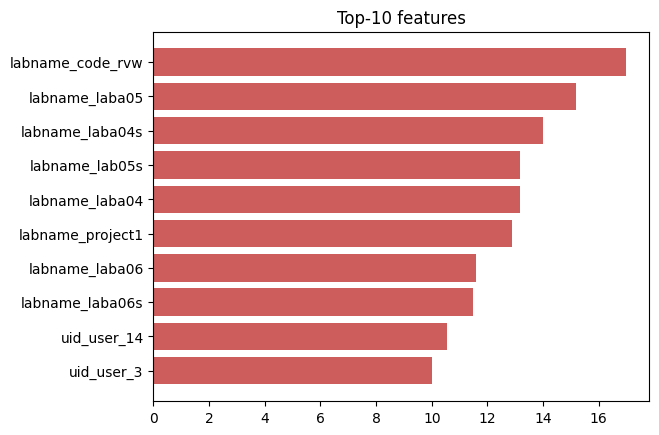

In [13]:
plot_barh(model, X.columns, 10)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [14]:
model = SVC(kernel='linear', probability=True, random_state=21)
model.fit(X, y)

SVC(kernel='linear', probability=True, random_state=21)

In [15]:
for kernel in ['linear', 'poly', 'sigmoid', 'rbf']:
    svc = SVC(probability=True, random_state=21, kernel=kernel)
    svc.fit(X, y)
    svc_prediction = svc.predict(X)
    acc_score = accuracy_score(y, svc_prediction)
    print(f'kernel = {kernel} accuracy_score = {acc_score}')

kernel = linear accuracy_score = 0.702846975088968
kernel = poly accuracy_score = 0.8594306049822064
kernel = sigmoid accuracy_score = 0.3997627520759193
kernel = rbf accuracy_score = 0.8558718861209964


In [16]:
ovr_model = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=21))
ovr_model.fit(X, y)

OneVsRestClassifier(estimator=SVC(kernel='linear', probability=True,
                                  random_state=21))

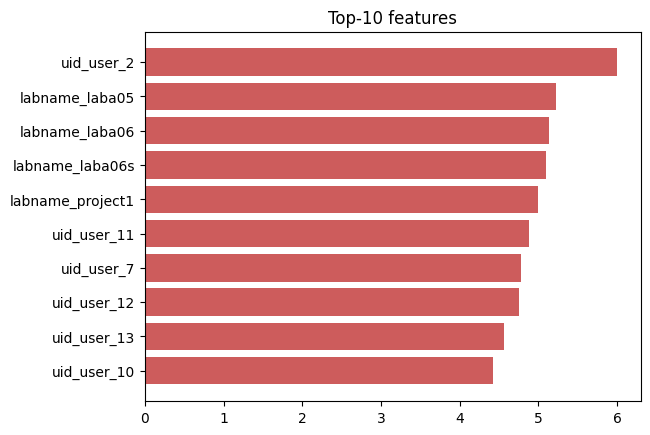

In [17]:
plot_barh(ovr_model, X.columns)

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [18]:
model = DecisionTreeClassifier(max_depth=4, random_state=21)
model.fit(X, y)

DecisionTreeClassifier(max_depth=4, random_state=21)

In [19]:
for depth in range(1, 25):
    model_test = DecisionTreeClassifier(max_depth=depth, random_state=42)
    DTC = model_test.fit(X, y)
    DTC_prediction = model_test.predict(X)
    print(accuracy_score(y, DTC_prediction))

0.35765124555160144
0.4389086595492289
0.48991696322657174
0.5516014234875445
0.6109134045077106
0.6637010676156584
0.7064056939501779
0.7502965599051008
0.7846975088967971
0.8196915776986952
0.8499406880189798
0.8831553973902728
0.9104389086595492
0.9317912218268091
0.9460260972716489
0.9608540925266904
0.9709371293001187
0.9798339264531435
0.9839857651245552
0.9869513641755635
0.9905100830367735
0.9922894424673784
0.9928825622775801
0.9958481613285883


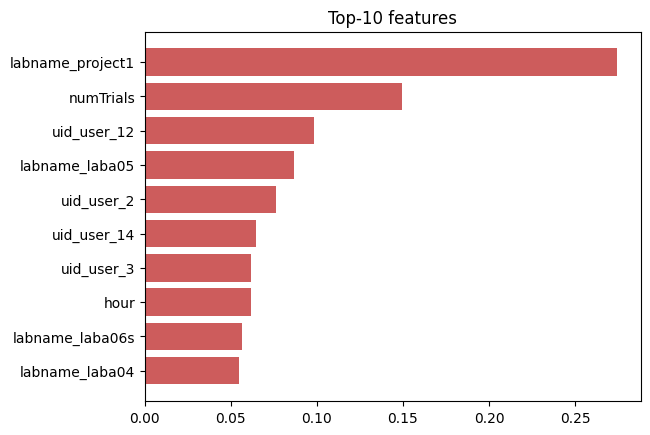

In [20]:
plot_barh(model, X.columns)

 ### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [21]:
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=21)
model.fit(X, y)

RandomForestClassifier(max_depth=3, random_state=21)

In [22]:
for depth in [3, 5, 10, 15, 20, 25, 30]:
    for n_estimators in [10, 25, 50, 70, 100, 130, 150]:
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=depth, random_state=21)
        model.fit(X, y)
        RFC_pred = model.predict(X)
        print(accuracy_score(y, RFC_pred))

0.45729537366548045
0.4638196915776987
0.47034400948991695
0.4721233689205219
0.4697508896797153
0.4697508896797153
0.4697508896797153
0.603202846975089
0.5960854092526691
0.5848161328588375
0.5747330960854092
0.5794780545670225
0.5883748517200474
0.5883748517200474
0.8285883748517201
0.8819691577698695
0.8701067615658363
0.8766310794780545
0.8855278766310795
0.8873072360616845
0.8801897983392646
0.9644128113879004
0.9679715302491103
0.9786476868327402
0.9786476868327402
0.9780545670225386
0.9792408066429419
0.9804270462633452
0.9839857651245552
0.9976275207591934
0.9970344009489917
0.9958481613285883
0.99644128113879
0.9970344009489917
0.9976275207591934
0.9958481613285883
0.9994068801897983
1.0
1.0
1.0
1.0
1.0
0.998220640569395
1.0
1.0
1.0
1.0
1.0
1.0


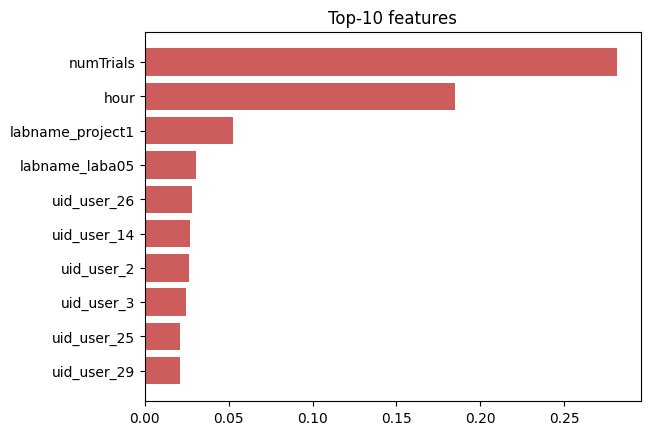

In [23]:
plot_barh(model, X.columns)